In [1]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
train_size = 20000

with open("../../../data/sarcasm.json","r") as f:
    datastore = json.load(f)

sentences, labels = [],[]

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [3]:
train_sentences = sentences[0:train_size]
test_sentences = sentences[train_size:]
train_labels = labels[0:train_size]
test_labels = labels[train_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length,
padding=padding_type, truncating= trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length,
padding=padding_type, truncating=trunc_type)
import numpy as np
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, GlobalAveragePooling1D
model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length), # Where the magic happens
                    # Flatten(),
                    GlobalAveragePooling1D(), # instead of flatten
                    Dense(24, activation='relu'),
                    Dense(1, activation='sigmoid')         
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
num_epochs = 20

history = model.fit(train_padded, train_labels, epochs=num_epochs,
validation_data=(test_padded, test_labels), verbose=2)

Epoch 1/20
625/625 - 2s - loss: 0.5627 - accuracy: 0.6956 - val_loss: 0.3945 - val_accuracy: 0.8343
Epoch 2/20
625/625 - 1s - loss: 0.3109 - accuracy: 0.8741 - val_loss: 0.3425 - val_accuracy: 0.8572
Epoch 3/20
625/625 - 1s - loss: 0.2333 - accuracy: 0.9071 - val_loss: 0.3456 - val_accuracy: 0.8551
Epoch 4/20
625/625 - 2s - loss: 0.1872 - accuracy: 0.9289 - val_loss: 0.3631 - val_accuracy: 0.8535
Epoch 5/20
625/625 - 1s - loss: 0.1550 - accuracy: 0.9438 - val_loss: 0.4000 - val_accuracy: 0.8501
Epoch 6/20
625/625 - 1s - loss: 0.1305 - accuracy: 0.9523 - val_loss: 0.4276 - val_accuracy: 0.8484
Epoch 7/20
625/625 - 1s - loss: 0.1114 - accuracy: 0.9614 - val_loss: 0.4726 - val_accuracy: 0.8401
Epoch 8/20
625/625 - 2s - loss: 0.0955 - accuracy: 0.9678 - val_loss: 0.5316 - val_accuracy: 0.8346
Epoch 9/20
625/625 - 2s - loss: 0.0840 - accuracy: 0.9719 - val_loss: 0.5664 - val_accuracy: 0.8313
Epoch 10/20
625/625 - 1s - loss: 0.0712 - accuracy: 0.9767 - val_loss: 0.6505 - val_accuracy: 0.8286

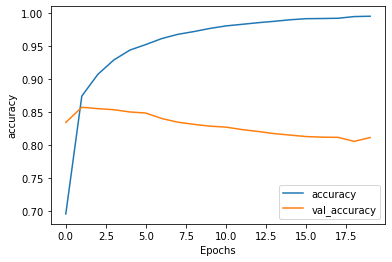

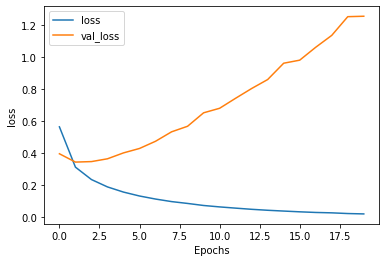

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss") # Confidence per prediction decreases
# change vocab_size (factor of 10 up or down), embedding_dim (factor of 2), max_len (factor of 2)